## Study DarkQuest acceptance

Simple 1D and 2D plots showing physics reach of darkquest detection of A'-> dileptons.

Depends on rates files in `data` directory, 

including the expected number of events and branching ratios etc

In [1]:
import math
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
import random as rand
from collections import OrderedDict
import mplhep as hep
plt.style.use(hep.style.CMS)
import utils
import matplotlib.tri as tri
from scipy.interpolate import griddata


Get the total number of A' produced

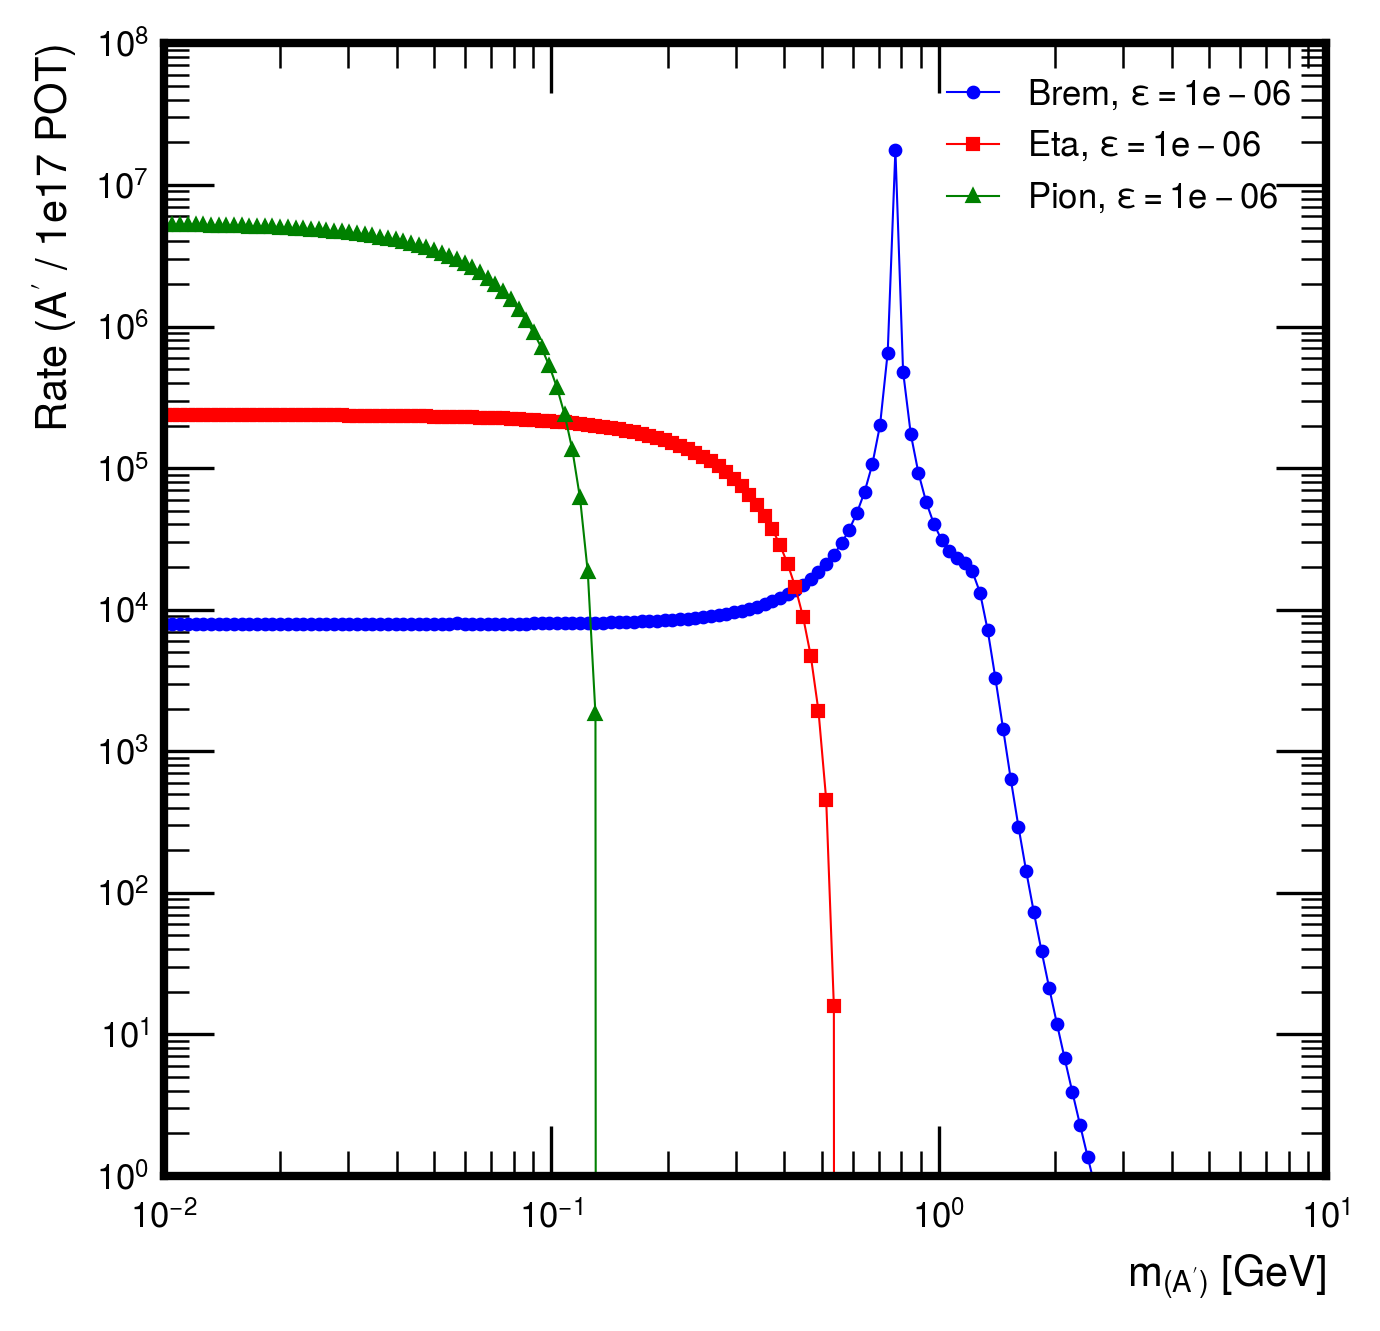

In [2]:
#NPOTs = 0.5e17
NPOTs = 1e18
#NPOTs = 1e17
#NPOTs = 1e16
utils.plotRates(NPOTs)

Get the Brs and A' times Brs

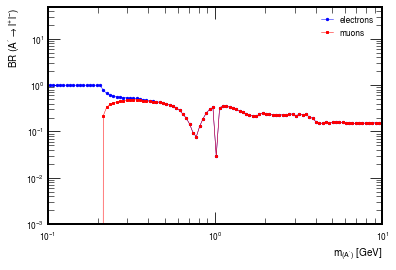

<Figure size 432x288 with 0 Axes>

In [3]:
utils.plotBR()

Function to loop over all the mass and couplings and calculate rates (NAp), branching ratios, acceptance, and final expected number of events

In [4]:
def yields(minVz, maxVz, lep="muons",mech="Brem"):
    
    events = utils.parseAccptFile(minVz,maxVz,lep,mech)
    
    masses = []
    epsilons = []
        
    for ev in events:
        if ev.getMass() not in masses:
            masses.append(ev.getMass())
        if ev.getEps() not in epsilons:
            epsilons.append(ev.getEps())
    
    NAps_per_eps = {}
    brs_per_eps = {}
    accpts_per_eps = {}
    nevts_per_eps = {}
    
    for eps in epsilons:
        
        NAps_per_eps['%.2e'%eps] = {}
        brs_per_eps['%.2e'%eps] = {}
        accpts_per_eps['%.2e'%eps] = {}
        nevts_per_eps['%.2e'%eps] = {}
        
        for m in masses:
            for ev in events:
                if ev.getMass() == m and ev.getEps() == eps:
                    NAp = utils.getRates(m, eps, NPOTs, mech)
                    br = utils.getBR(m, lep)
                    #print(f"m {m} epsilon {eps} NAp {NAp} br {br} rate {rate} accpt {ev.getAccpt()}")
            
                    NAps_per_eps  ['%.2e'%eps]['%.3f'%m] = NAp
                    brs_per_eps   ['%.2e'%eps]['%.3f'%m] = br
                    accpts_per_eps['%.2e'%eps]['%.3f'%m] = ev.getAccpt()
                    nevts_per_eps ['%.2e'%eps]['%.3f'%m] = ev.getAccpt() * NAp
                    
                    break
    
    return accpts_per_eps, nevts_per_eps, NAps_per_eps, brs_per_eps 

In [5]:
def plot2D(inputs2D, lep = "muons", mech="Brem", title= "Acceptance", zmin = None, zmax = None, dologz = False):   
    
    mass_to_plot = []
    eps_to_plot = []
    acc_to_plot = []
    with open (f"{title}_{mech}_{lep}_{NPOTs}.txt","a") as file:
        for eps, vals in inputs2D.items():
            for m, acc in vals.items():
                #print(f"mass {m} eps {eps} acc {acc}")
                #if acc > zmin:
                mass_to_plot.append(float(m))
                eps_to_plot.append(float(eps))
                acc_to_plot.append(float(acc))
                file.write(f"{str(m)} {str(eps)} {str(acc)}\n")
        
    # now plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    #print(mass_to_plot)
    #print(eps_to_plot)
    if dologz:
        sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, s=6,cmap=matplotlib.cm.YlOrRd, norm = matplotlib.colors.LogNorm())
    else:
        sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd)
    #sc = plt.tricontourf(mass_to_plot, eps_to_plot, acc_to_plot, 15)
    #print("scatter: ", sc)
    ax.set_xlabel("mass [GeV]")
    ax.set_ylabel(r"$\epsilon$")
    ax.set_title(f'{title}', fontsize=20)
    ax.set_yscale('log')
    ax.set_ylim(1e-10,1e-2)
    ax.set_xlim(0.001,0.6)
    if lep=='muons':
        if 'Brem' in mech:
            ax.set_xlim(.20,1.4)
        else:
            ax.set_xlim(0.2,0.6)
    if lep=='electrons':
        if 'Brem' in mech:
            #ax.set_xlim(.01,3.05)
            ax.set_xlim(.05,1.4)
            #ax.set_xscale('log')
        else:
            ax.set_xlim(.05,1.1) 
            #ax.set_xscale('log')
        
    
    fig.colorbar(sc, ax=ax)
    if zmin and zmax:
        sc.set_clim(zmin,zmax)
    #plt.show()
    plt.savefig(f"{title}_{lep}_{mech}.png")
    plt.show()
    #plt.clf()

Brem muons


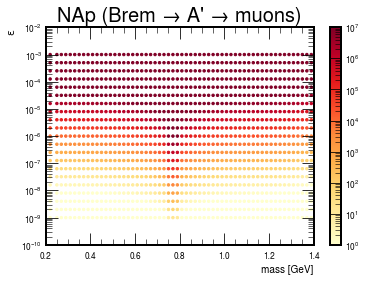

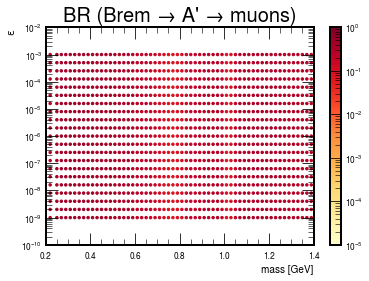

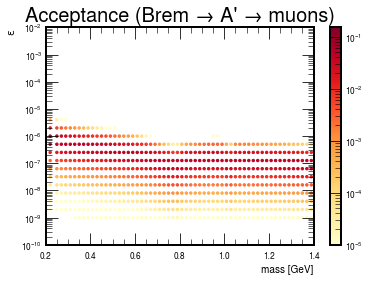

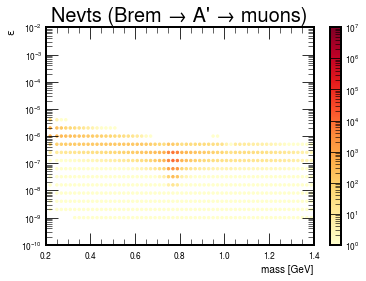

Brem electrons


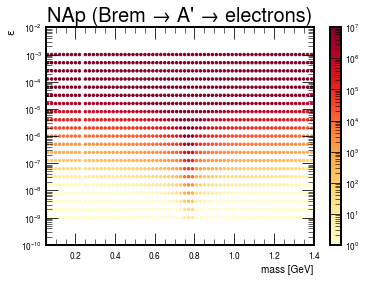

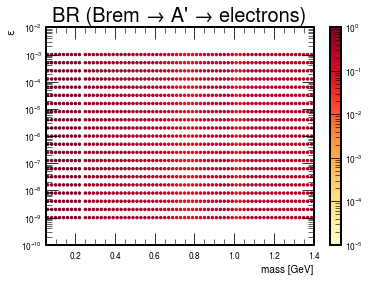

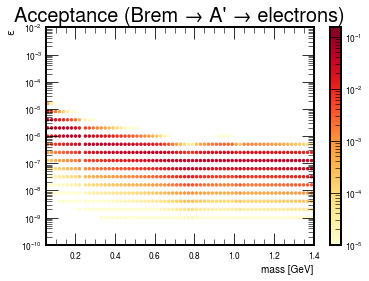

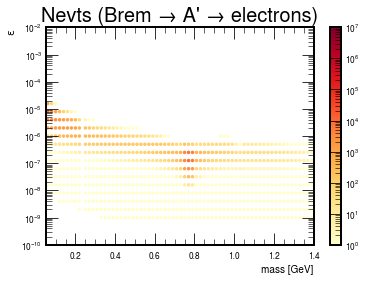

Eta muons


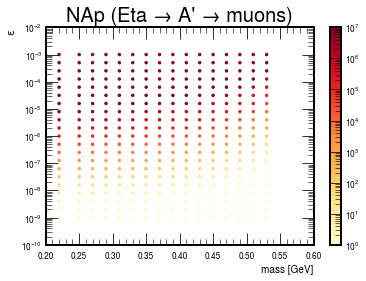

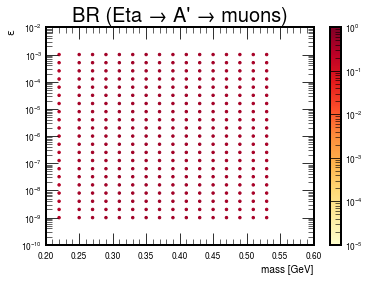

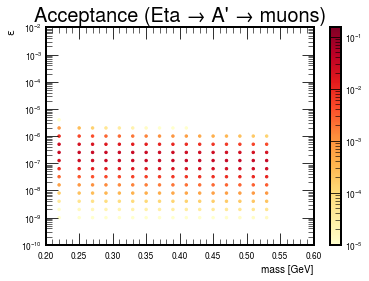

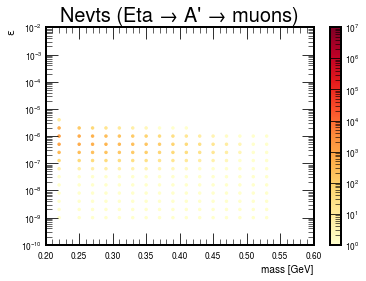

Eta electrons


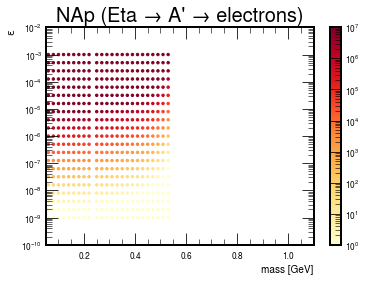

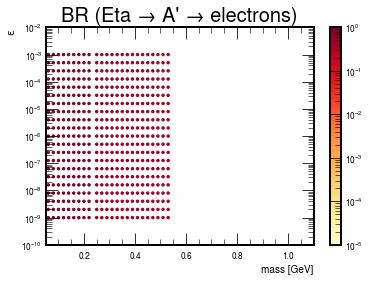

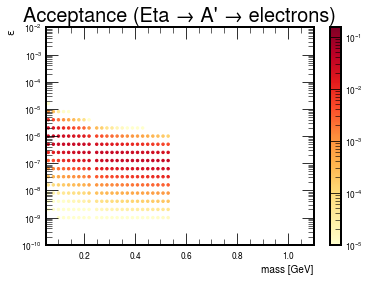

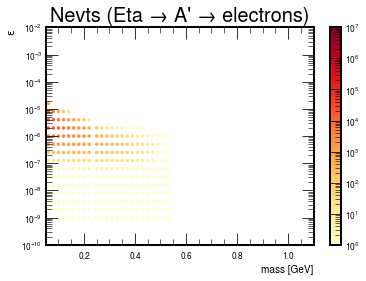

Pion electrons


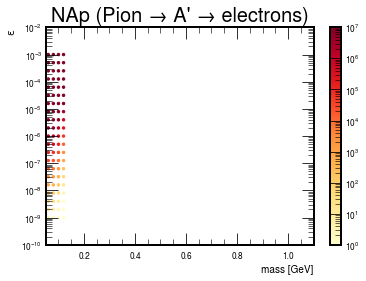

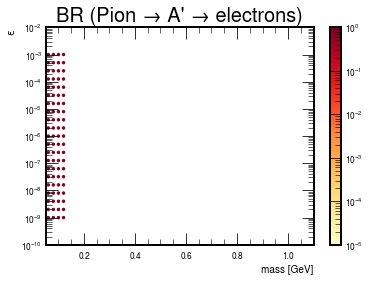

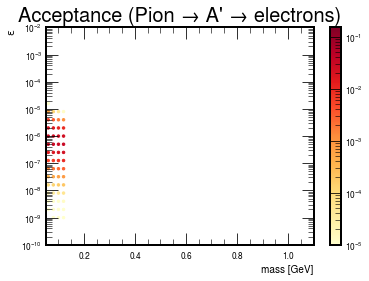

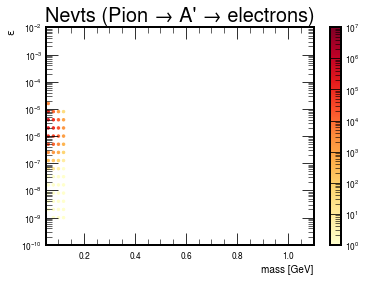

In [6]:
for mech in ["Brem", "Eta","Pion"]:
    for lep in ["muons", "electrons"]:
        
        if lep == "muons" and mech=="Pion":
            continue
            
        if lep == "muons":
            slep = "$A^{\prime} \Rightarrow \mu^{+}\mu^{-}$"
        else:
            slep = "$A^{\prime} \Rightarrow e^{+}e^{-}$"
            
        Nmax = 1e5
        if lep == "electrons":
            Nmax = 1e7
            
        accpts, Nevts, NAps, brs = yields(3300,3800,lep,mech)
        print(mech+" "+lep)
        plot2D(NAps, zmax = 1e7, zmin = 1,title = f"NAp ({mech} \u2192 A' \u2192 {lep})", lep = lep, mech = mech, dologz=1)
        plot2D(brs, zmax = 1, zmin = 1e-5,title = f"BR ({mech} \u2192 A' \u2192 {lep})", lep = lep, mech = mech, dologz=1)
        plot2D(accpts, zmax = 0.15, zmin = 1e-5, lep = lep, mech = mech, title = f"Acceptance ({mech} \u2192 A' \u2192 {lep})", dologz=1)
        plot2D(Nevts, zmax = 1e7, zmin = 1,title = f"Nevts ({mech} \u2192 A' \u2192 {lep})", lep = lep, mech = mech, dologz=1)


In [7]:
accpts, Nevts_brem_muons, NAps, brs = yields(500,600,"muons","Brem")
accpts, Nevts_eta_muons, NAps, brs = yields(500,600,"muons","Eta")
accpts, Nevts_eta_electrons, NAps, brs = yields(500,600,"electrons","Eta")
accpts, Nevts_pion_electrons, NAps, brs = yields(500,600,"electrons","Pion")

100
100
100


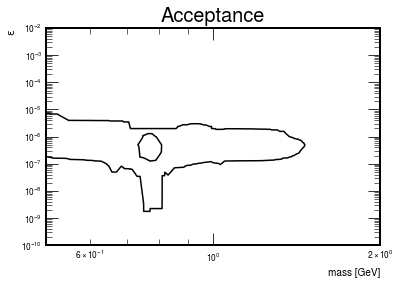

100
100
100


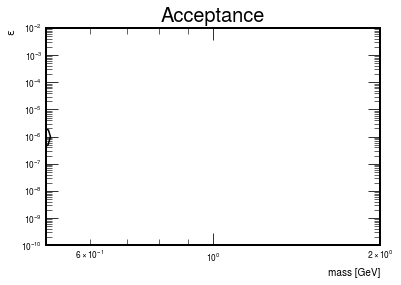

100
100
100


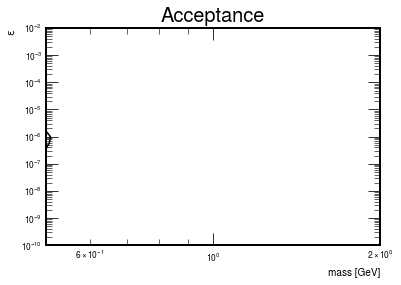

100
100
100


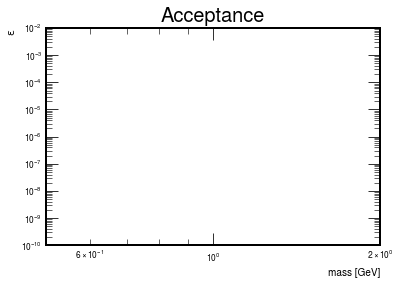

In [8]:
def plotContour(inputs2D, inputs2D_Eta = None, lep = "muons", mech="Brem", title= "Acceptance", zmin = None, zmax = None, dologz = False):   
    
    mass_to_plot = []
    eps_to_plot = []
    acc_to_plot = []
    for eps, vals in inputs2D.items():
        for m, acc in vals.items():
            #print(f"mass {m} eps {eps} acc {acc}")
            #if acc > zmin:
            mass_to_plot.append(float(m))
            eps_to_plot.append(float(eps))
            acc_to_plot.append(float(acc))
            
      
            
    # Define grid.
    grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
    # Create logarithmic grid
    linear_x = np.linspace(0, 2.0, 100)
    log_y = np.linspace(-9.0, -3.0, 100)
    grid_x, grid_y = np.meshgrid(linear_x, 10**log_y)

    # Interpolate z values on a grid
    z1_interp = griddata((mass_to_plot, eps_to_plot), acc_to_plot, (grid_x, grid_y), method='cubic')
        
    # now plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    print(len(grid_x))
    print(len(grid_y))
    print(len(z1_interp))
  
    #if dologz:
    #    sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd, norm = matplotlib.colors.LogNorm())
    #else:
    #    sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd)
    #sc = ax.tricontourf(mass_to_plot, eps_to_plot, acc_to_plot, levels=[1.0,10.0,100.0,200.0], cmap=matplotlib.cm.YlOrRd)
    ac_mask=np.isfinite(acc_to_plot)
    #for ele in ac_mask:
    #    print(ele)
    a=np.array(acc_to_plot)[ac_mask]
    sc = ax.tricontour(np.array(mass_to_plot)[ac_mask], np.array(eps_to_plot)[ac_mask], np.array(acc_to_plot)[ac_mask], levels=[10.0,10000.0],colors='black')
    
    ax.set_xlabel("mass [GeV]")
    ax.set_ylabel(r"$\epsilon$")
    ax.set_title(f'{title}', fontsize=20)
    ax.set_yscale('log')
    if lep=='muons':
        if 'Brem' in mech:
            ax.set_xlim(.20,2.0)
        else:
            ax.set_xlim(0.2,0.6)
    if lep=='electrons':
        ax.set_ylim(1e-8,1e-2)
        if 'Brem' in mech:
            #ax.set_xlim(.01,3.05)
            ax.set_xlim(.05,2.0)
            ax.set_xscale('log')
        else:
            ax.set_xlim(.05,1.1) 
            ax.set_xscale('log')
    ax.set_ylim(1e-10,1e-2)
    ax.set_xlim(0.1,2.0)
    ax.set_xscale('log')
    #ax.set_ylim(1e-8,1e-5)
    ax.set_xlim(0.5, 2.0)
    #fig.colorbar(sc, ax=ax)
    if zmin and zmax:
        sc.set_clim(zmin,zmax)
    #plt.show()
    plt.savefig(f"{title}_{lep}_{mech}.png")
    plt.show()
    
plotContour(Nevts_brem_muons, None)
plotContour(Nevts_eta_muons, None)
plotContour(Nevts_eta_electrons, None)
plotContour(Nevts_pion_electrons, None)

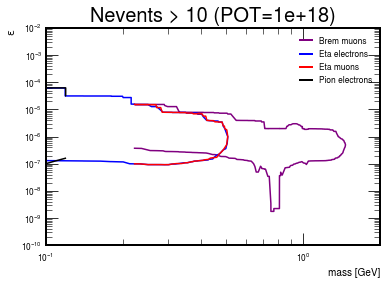

In [9]:
from matplotlib.lines import Line2D
def plotContourAll(inputs2D, inputs2D_Eta = None, lep = "muons", mech="Brem", title= f"Nevents > 10 (POT={NPOTs})", zmin = None, zmax = None, dologz = False):   
    
    
      
            
    # Define grid.
    grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
    # Create logarithmic grid
    linear_x = np.linspace(0, 2.0, 100)
    log_y = np.linspace(-9.0, -3.0, 100)
    grid_x, grid_y = np.meshgrid(linear_x, 10**log_y)

    # Interpolate z values on a grid
    
        
    # now plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("mass [GeV]")
    ax.set_ylabel(r"$\epsilon$")
    ax.set_title(f'{title}', fontsize=20)
    ax.set_yscale('log')
    ax.set_ylim(1e-10,1e-2)
    ax.set_xlim(0.1,2.0)
    ax.set_xscale('log')
    alllabels=["Brem muons","Eta electrons","Eta muons","Pion electrons"]
    allcolors=["purple","blue","red","black"]
    legend_handles=[]
    for i in range(len(inputs2D)):
        input2D=inputs2D[i]
        mass_to_plot = []
        eps_to_plot = []
        acc_to_plot = []
        for eps, vals in input2D.items():
            for m, acc in vals.items():
            #print(f"mass {m} eps {eps} acc {acc}")
            #if acc > zmin:
                mass_to_plot.append(float(m))
                eps_to_plot.append(float(eps))
                acc_to_plot.append(float(acc))
        ac_mask=np.isfinite(acc_to_plot)
        a_mass=np.array(mass_to_plot)[ac_mask]
        a_eps=np.array(eps_to_plot)[ac_mask]
        a_acc=np.array(acc_to_plot)[ac_mask]
        z1_interp = griddata((a_mass, a_eps), a_acc, (grid_x, grid_y), method='cubic')
    #if dologz:
    #    sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd, norm = matplotlib.colors.LogNorm())
    #else:
    #    sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd)
    #sc = ax.tricontourf(mass_to_plot, eps_to_plot, acc_to_plot, levels=[1.0,10.0,100.0,200.0], cmap=matplotlib.cm.YlOrRd)
        sc = ax.tricontour(a_mass, a_eps, a_acc, levels=[10.0,1000000.0],colors=[allcolors[i]])
        #sc.collections[0].set_label(alllabels[i])
        handle = Line2D([0], [0], color=allcolors[i], lw=2, label=alllabels[i])
        legend_handles.append(handle)
    #ax.set_ylim(1e-8,1e-5)
    #ax.set_xlim(0.5, 1.0)
    #fig.colorbar(sc, ax=ax)
    ax.legend(handles=legend_handles)
    if zmin and zmax:
        sc.set_clim(zmin,zmax)
    #plt.show()
    plt.savefig(f"reach_curve_{NPOTs}.pdf")
    plt.show()
    
plotContourAll([Nevts_brem_muons,Nevts_eta_electrons,Nevts_eta_muons,Nevts_pion_electrons], None)

100 [0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.7

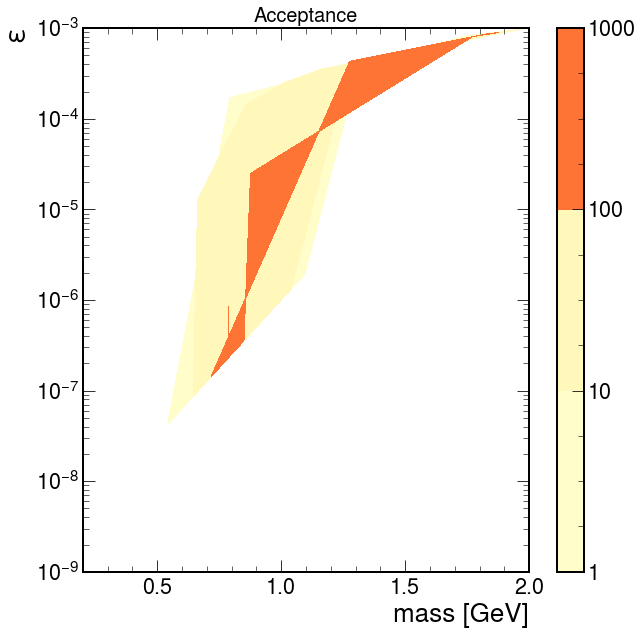

100 [0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.7

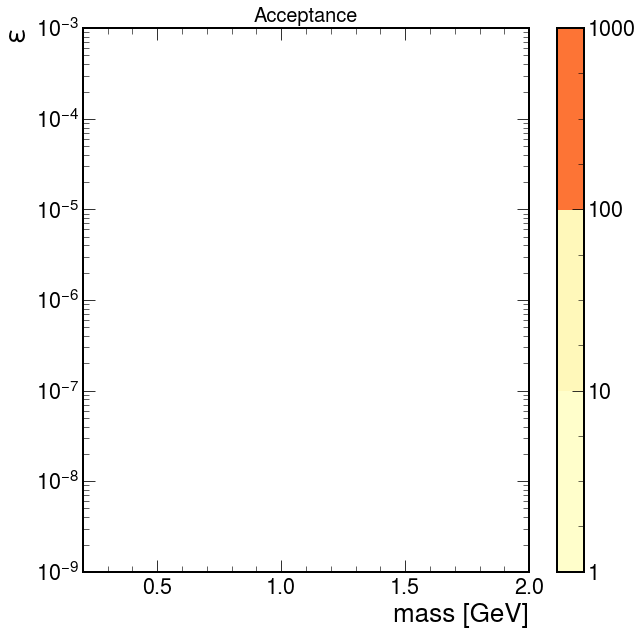

In [58]:
def plotContour(inputs2D, inputs2D_Eta = None, lep = "muons", mech="Brem", title= "Acceptance", zmin = None, zmax = None, dologz = False):   
    
    mass_to_plot = []
    eps_to_plot = []
    acc_to_plot = []
    for eps, vals in inputs2D.items():
        for m, acc in vals.items():
            #print(f"mass {m} eps {eps} acc {acc}")
            #if acc > zmin:
            mass_to_plot.append(float(m))
            eps_to_plot.append(float(eps))
            acc_to_plot.append(float(acc))
      
            
    # Define grid.
    grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
    # Create logarithmic grid
    linear_x = np.linspace(0, 2.0, 100)
    log_y = np.linspace(-9.0, -3.0, 100)
    grid_x = linear_x
    grid_y = 10**log_y
    #grid_x, grid_y = np.meshgrid(linear_x, 10**log_y)

    # Interpolate z values on a grid
    z1_interp = griddata((mass_to_plot, eps_to_plot), acc_to_plot, (grid_x, grid_y), method='linear')
    
    z1_interp = np.nan_to_num(z1_interp, nan=0)

        
    # now plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    print(len(grid_x), grid_x)
    print(len(grid_y), grid_y)
    print(len(z1_interp), z1_interp)
  
    #if dologz:
    #    sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd, norm = matplotlib.colors.LogNorm())
    #else:
    #    sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd)
    sc = ax.tricontourf(grid_x, grid_y, z1_interp, levels=[1.0,10.0,100.0,1000.0], cmap=matplotlib.cm.YlOrRd)
    
    
    ax.set_xlabel("mass [GeV]")
    ax.set_ylabel(r"$\epsilon$")
    ax.set_title(f'{title}', fontsize=20)
    ax.set_yscale('log')
    if lep=='muons':
        if 'Brem' in mech:
            ax.set_xlim(.20,2.0)
        else:
            ax.set_xlim(0.2,0.6)
    if lep=='electrons':
        ax.set_ylim(1e-8,1e-2)
        if 'Brem' in mech:
            #ax.set_xlim(.01,3.05)
            ax.set_xlim(.05,2.0)
            ax.set_xscale('log')
        else:
            ax.set_xlim(.05,1.1) 
            ax.set_xscale('log')
    #ax.set_ylim(1e-8,1e-5)
    #ax.set_xlim(0.5, 1.0)
    fig.colorbar(sc, ax=ax)
    if zmin and zmax:
        sc.set_clim(zmin,zmax)
    #plt.show()
    plt.savefig(f"{title}_{lep}_{mech}.png")
    plt.show()
    
plotContour(Nevts, None)
plotContour(Nevts_eta, None)

